In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data =pd.read_csv('AirPassengers.csv')
data.head()

,Month,Passengers
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [3]:
data = data['Passengers']
data = np.array(data).reshape(-1,1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

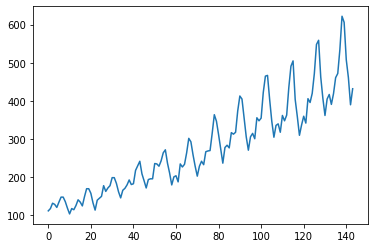

In [4]:
plt.plot(data)

In [5]:
scaler =MinMaxScaler()
data = scaler.fit_transform(data)
data.min()

0.0

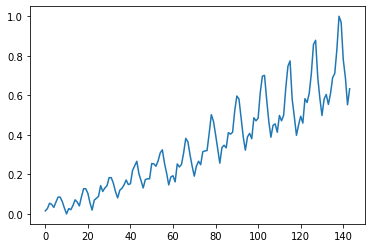

In [6]:
plt.plot(data)

In [7]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [8]:
train_size=100
test_size=44

In [9]:
train_set = data[0:train_size,:]
train_set.shape

(100, 1)

In [10]:
test_set = data[train_size:train_size+test_size,:]
test_set.shape

(44, 1)

In [11]:
def get_data(data,look_back):
    dataX,dataY=[],[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(data[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [12]:
look_back=1
X_train,y_train=get_data(train_set,look_back)

In [13]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [14]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [15]:
X_test,y_test=get_data(test_set,look_back)

In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
X_train.shape

(98, 1, 1)

## RNN + LSTM

In [18]:
model=Sequential()
model.add(LSTM(5,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,epochs=50,batch_size=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
98/98 [==============================] - 2s 18ms/sample - loss: 0.0422
Epoch 2/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0183
Epoch 3/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0145
Epoch 4/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0132
Epoch 5/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0118
Epoch 6/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0105
Epoch 7/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0095
Epoch 8/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0084
Epoch 9/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0073
Epoch 10/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0063
Epoch 11/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0055
Epoch 12/50


## Evaluation

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred =scaler.inverse_transform(y_pred)

In [23]:
y_pred

array([[351.7552 ],
       [421.1298 ],
       [465.75095],
       [467.82132],
       [402.43518],
       [343.53683],
       [300.81982],
       [332.27374],
       [336.36404],
       [313.9527 ],
       [358.96268],
       [344.56293],
       [359.9935 ],
       [434.6337 ],
       [492.6055 ],
       [506.99985],
       [402.43518],
       [355.87198],
       [305.86017],
       [333.29575],
       [356.90192],
       [338.41156],
       [404.5115 ],
       [394.1334 ],
       [419.05212],
       [472.99423],
       [550.82294],
       [561.9221 ],
       [463.6799 ],
       [405.5498 ],
       [358.96268],
       [403.47333],
       [415.93567],
       [388.94843],
       [418.01328],
       [461.60822],
       [472.99423],
       [537.6435 ],
       [624.42596],
       [608.7361 ],
       [510.0772 ],
       [461.60822]], dtype=float32)

In [24]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

In [25]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

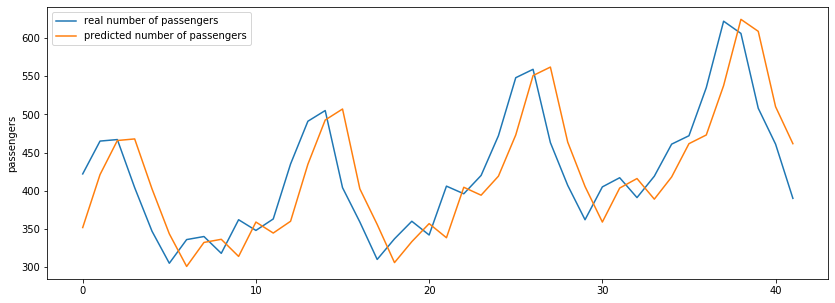

In [26]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of passengers')
plt.plot(y_pred,label='predicted number of passengers')
plt.ylabel('passengers')
plt.legend()
plt.show()